<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Приоритизация-гипотез." data-toc-modified-id="Приоритизация-гипотез.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Приоритизация гипотез.</a></span></li><li><span><a href="#Анализ-А/В---теста." data-toc-modified-id="Анализ-А/В---теста.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ А/В - теста.</a></span><ul class="toc-item"><li><span><a href="#Кумулятивная-выручка-по-группам." data-toc-modified-id="Кумулятивная-выручка-по-группам.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Кумулятивная выручка по группам.</a></span></li><li><span><a href="#Кумулятивный-средний-чек-по-группам." data-toc-modified-id="Кумулятивный-средний-чек-по-группам.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Кумулятивный средний чек по группам.</a></span></li><li><span><a href="#Относительное-изменение-кумулятивного-среднего-чека-группы-В-к-группе-А." data-toc-modified-id="Относительное-изменение-кумулятивного-среднего-чека-группы-В-к-группе-А.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Относительное изменение кумулятивного среднего чека группы В к группе А.</a></span></li><li><span><a href="#Кумулятивная-конверсия-по-группам." data-toc-modified-id="Кумулятивная-конверсия-по-группам.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Кумулятивная конверсия по группам.</a></span></li><li><span><a href="#Относительное-изменение-кумулятивной-конверсии-группы-В-к-группе-А." data-toc-modified-id="Относительное-изменение-кумулятивной-конверсии-группы-В-к-группе-А.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Относительное изменение кумулятивной конверсии группы В к группе А.</a></span></li><li><span><a href="#Распределение-количества-и-стоимости-заказов-по-пользователям;-поиск-аномалий." data-toc-modified-id="Распределение-количества-и-стоимости-заказов-по-пользователям;-поиск-аномалий.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Распределение количества и стоимости заказов по пользователям; поиск аномалий.</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-конверсии-между-группами-по-сырым-и-очищенным-данным." data-toc-modified-id="Cтатистическая-значимость-различий-в-конверсии-между-группами-по-сырым-и-очищенным-данным.-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Cтатистическая значимость различий в конверсии между группами по сырым и очищенным данным.</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-среднем-чеке-между-группами-по-сырым-и-очищенным-данным." data-toc-modified-id="Cтатистическая-значимость-различий-в-среднем-чеке-между-группами-по-сырым-и-очищенным-данным.-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Cтатистическая значимость различий в среднем чеке между группами по сырым и очищенным данным.</a></span></li></ul></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></div>

# Приоритизация гипотез; анализ результатов A/B-теста.

Задачи проекта: 
1. Выбор приоритетной гипотезы по увеличению выручки интернет-магазина;
2. Анализ результатов А/В-теста.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Приоритизация гипотез.

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


<div style="background:#d4d6fa; color:#000; padding:10px">
    <p><b> Комментарий ревьюера: </b></p>
    
По-хорошему всё равно нужно написать пару слов о качестве входных данных. Но будем считать, что таблица маленькая. Всём всё видно. И с данными всё в порядке.
</div>


Приоритизация: **метод ICE**

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


Приортизицаия: **метод RICE**

In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
display(hypothesis[['Hypothesis', 'ICE', 'RICE']].sort_values(by = 'RICE', ascending = False))

,Hypothesis,ICE,RICE
7,Добавить форму подписки на все основные страни...,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",13.33,40.0
6,Показать на главной странице баннеры с актуаль...,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00,3.0


По **ICE** в топе были **гипотезы 8, 0, 7**. <br>
По **RICE** - **гипотезы 7, 2, 0**. <br>
Разница между двумя этими методиками только в учете одного параметра: Reach (охват пользователей), RICE при оценке его учитывает, ICE - нет. В итоге результаты различаются, но не драматически: **гипотезы №7 и №0 входят в топ-3 в обоих случаях**. <br> 
С проверки этих гипотез и имеет смысл начать, тем более, что сама компания оценивает актуальность и значимость (impact) этих гипотез на 7 и 10 из 10.

## Анализ А/В - теста. 

Посмотрим на **исходные данные**:

In [6]:
orders = pd.read_csv('orders.csv')

In [7]:
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors = pd.read_csv('visitors.csv')

In [9]:
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


данные без пропусков; стоит изменить тип данных в столбцах с датами:

In [10]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Посмотрим, **насколько корректно поделен трафик между группами**:
1. равны ли группы по количеству пользователей;
2. является ли каждый пользователь участником только одной из групп.

In [12]:
# количество пользователей в группах А и В:
orders.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

In [13]:
ratio_AB = orders.query('group == "A"')['visitorId'].nunique() / orders.query('group == "B"')['visitorId'].nunique() * 100
print('Отношение количества участников группы А к участникам группы В (в процентах):', ratio_AB)

Отношение количества участников группы А к участникам группы В (в процентах): 85.83617747440273


Допустимым считается различие между группами по количеству участников не более 1%, в нашем случае - почти 15%.  

In [14]:
# уникальность участников:
not_unique_users = orders.groupby('visitorId')['group'].nunique().reset_index()
not_unique_users[not_unique_users['group'] > 1].shape

(58, 2)

58 пользователей (почти 18%) у нас участвуют одновременно в двух группах.

Итак, у нас около 15% разница в численном составе сравниваемых групп и около 18% пользователей являются участниками двух групп одновременно. Теоретически можно было бы убрать "двойных агентов" из исследования, но это может нарушить репрезентативность выборок. 
**Приходится признать, что трафик поделен некорректно** и исправить это мы не можем. <br>
Анализ проведём по имеющимся данным, но к результатам будем относиться с подозрением)

### Кумулятивная выручка по группам. 

In [15]:
# получим агрегированные кумулятивные данные по дням заказов: 
dates_groups = orders[['date', 'group']].drop_duplicates()
orders_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == \
x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, \
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [16]:
visitors_agg = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == \
x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [17]:
cumulative_data = orders_agg.merge(visitors_agg, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [18]:
# отделим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням и по группам:
cum_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'orders', 'revenue']]
cum_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'orders', 'revenue']]

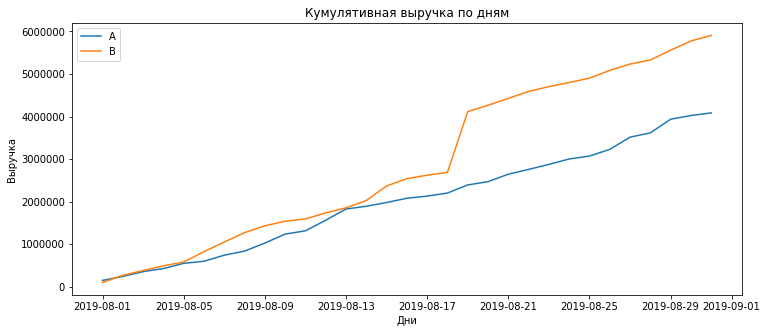

In [19]:
# график выручки по группам:
plt.figure(figsize=(12,5))
plt.title("Кумулятивная выручка по дням")
plt.xlabel("Дни")
plt.ylabel("Выручка")
plt.plot(cum_revenue_A['date'], cum_revenue_A['revenue'], label = 'A')
plt.plot(cum_revenue_B['date'], cum_revenue_B['revenue'], label = 'B')
plt.legend()
plt.show()

Выручка группы А плавно растет в течение всего теста; в группе В - резкий скачок в районе 18-19 августа. Это может означать всплеск числа заказов, или появление очень дорогих заказов в выборке. Наличие здесь аномалий проверим позже.

### Кумулятивный средний чек по группам. 

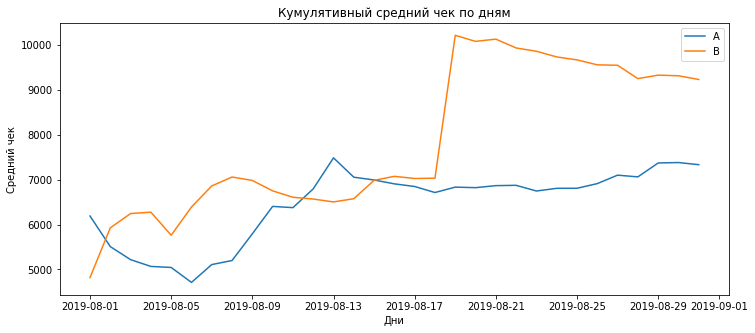

In [20]:
plt.figure(figsize=(12,5))
plt.title("Кумулятивный средний чек по дням")
plt.xlabel("Дни")
plt.ylabel("Средний чек")
plt.plot(cum_revenue_A['date'], cum_revenue_A['revenue'] / cum_revenue_A['orders'], label = 'A')
plt.plot(cum_revenue_B['date'], cum_revenue_B['revenue'] / cum_revenue_B['orders'], label = 'B')
plt.legend()
plt.show()

Судя по графику, средний чек группы В выше, чем группы А. Необходимо будет проверить, значим ли этот результат: слишком резкий скачок на графике, похоже на какие-то аномалии.

### Относительное изменение кумулятивного среднего чека группы В к группе А. 

In [21]:
# собираем агрегированные данные в одном месте:
cum_revenue_merged = cum_revenue_A.merge(cum_revenue_B, left_on = 'date', right_on = 'date', how = 'left', \
suffixes = ['A', 'B'])
cum_revenue_merged.head()

,date,ordersA,revenueA,ordersB,revenueB
0,2019-08-01,24,148579,21,101217
1,2019-08-02,44,242401,45,266748
2,2019-08-03,68,354874,61,380996
3,2019-08-04,84,425699,78,489567
4,2019-08-05,109,549917,101,581995


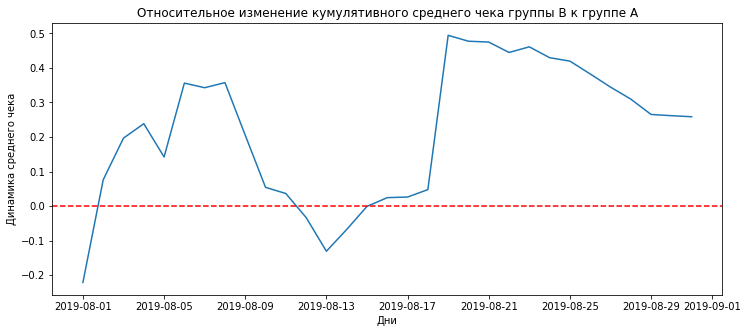

In [22]:
# строим на графике отношение средних чеков:
plt.figure(figsize=(12,5))
plt.title("Относительное изменение кумулятивного среднего чека группы В к группе А")
plt.xlabel("Дни")
plt.ylabel("Динамика среднего чека")
plt.plot(cum_revenue_merged['date'], (cum_revenue_merged['revenueB'] / cum_revenue_merged['ordersB'])\
/ (cum_revenue_merged['revenueA'] / cum_revenue_merged['ordersA']) -1)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.show()

Слишком резкие скачки, результат не стабилен и похоже, что сильно влияют выбросы.

### Кумулятивная конверсия по группам. 

In [23]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
# отделяем группы
cumulative_data_A = cumulative_data.query('group == "A"') 
cumulative_data_B = cumulative_data.query('group == "B"') 

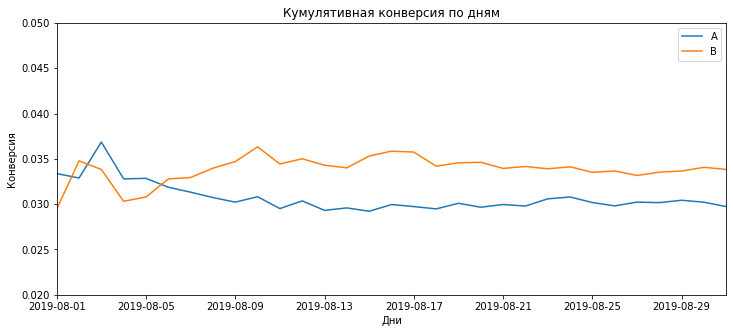

In [24]:
plt.figure(figsize=(12,5))
plt.title("Кумулятивная конверсия по дням")
plt.xlabel("Дни")
plt.ylabel("Конверсия")
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label = 'A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label = 'B')
plt.legend()
plt.axis(['2019-08-01', '2019-08-31', 0.02, 0.05])
plt.show()

После недолгих колебаний конверсия группы В стабильно показывает лучший результат.

### Относительное изменение кумулятивной конверсии группы В к группе А. 

In [25]:
# собираем данные:
cum_conversion_merged = cumulative_data_A[['date', 'conversion']].merge(cumulative_data_B[['date', 'conversion']],\
left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

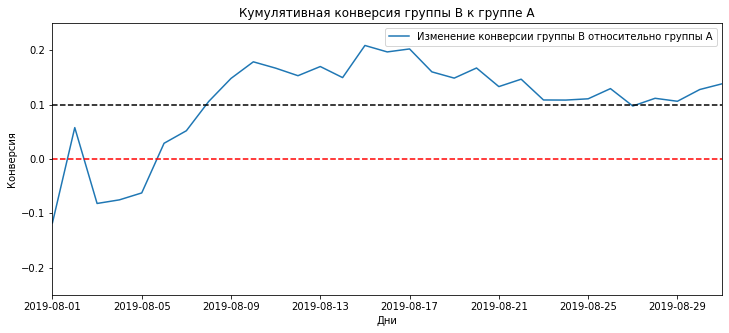

In [26]:
# строим на графике отношение кумулятивной конверсии:
plt.figure(figsize=(12,5))
plt.title("Кумулятивная конверсия группы В к группе А")
plt.xlabel("Дни")
plt.ylabel("Конверсия")
plt.plot(cum_conversion_merged['date'], cum_conversion_merged['conversionB'] / cum_conversion_merged['conversionA']\
- 1, label = "Изменение конверсии группы В относительно группы А")
plt.legend()
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.axhline(y = 0.1, color = 'black', linestyle = '--')
plt.axis(['2019-08-01', '2019-08-31', -0.25, 0.25])
plt.show()

Первенство группы В по конверсии кажется стабильным и убедительным. После первых нескольких дней резких скачков нет. <br>
Хотя данные пока не очищены от аномалий, так что окончательные выводы делать рано. <br>
Посмотрим ниже на распределение количества и стоимости заказов. 

### Распределение количества и стоимости заказов по пользователям; поиск аномалий.  

Посмотрим **распределение по количеству заказов**: 

In [27]:
orders_by_users = (orders.drop(['group', 'revenue', 'date'], axis = 1).groupby('visitorId', as_index = False)\
.agg({'transactionId': pd.Series.nunique}))
orders_by_users.columns = ['user_id', 'orders']

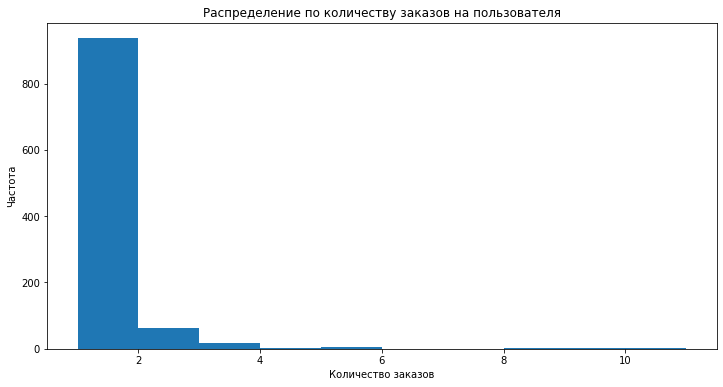

In [28]:
plt.figure(figsize=(12,6))
plt.title("Распределение по количеству заказов на пользователя")
plt.xlabel("Количество заказов")
plt.ylabel("Частота")
plt.hist(orders_by_users['orders'])
plt.show()

Значительное большинство пользователей делает только один заказ. Посмотрим распределение на точечной диаграмме.

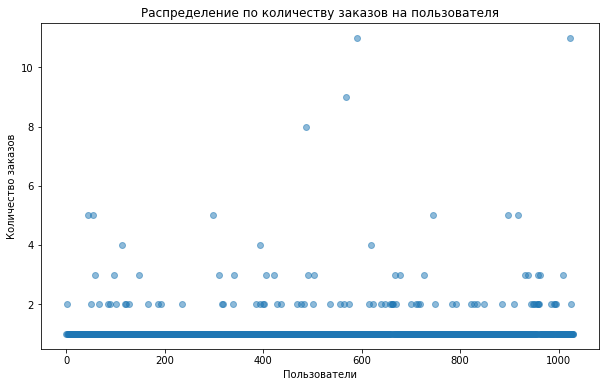

In [29]:
plt.figure(figsize=(10,6))
plt.title("Распределение по количеству заказов на пользователя")
plt.xlabel("Пользователи")
plt.ylabel("Количество заказов")
x_values_ord = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values_ord, orders_by_users['orders'], alpha = 0.5)
plt.show()

Много пользователей с 2 заказами. Чтобы понять, считать ли 3 заказа аномалиями или нет, нужно определиться с их точной долей. <br>
Посчитаем перцентили (95 и 99):

In [30]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


всего 1% пользователей оформляли больше 4 заказов,  5% - сделали больше 2 заказов. А истина, вероятно, посередине:

In [31]:
print(np.percentile(orders_by_users['orders'], 97.5))

3.0


**Определим 3 заказа (97.5 перцентиля) за верхнюю границу количества заказов и отсеем аномальных пользователей по ней**.

**Распределение по стоимости заказов:** 

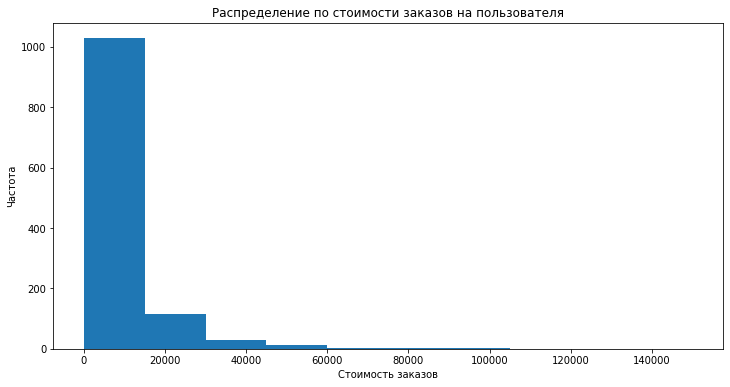

In [32]:
plt.figure(figsize=(12,6))
plt.title("Распределение по стоимости заказов на пользователя")
plt.xlabel("Стоимость заказов")
plt.ylabel("Частота")
plt.hist(orders['revenue'], range = (0, 150000))
plt.show()

Большая часть заказов - в пределах 30 тыс. рублей. Но от 30 до 60 тыс. рублей заказов тоже немало. Посмотрим точечные диаграммы (по всем заказам, и подробнее - по заказам в пределах 60 тыс. рублей) и посчитаем перцентили:

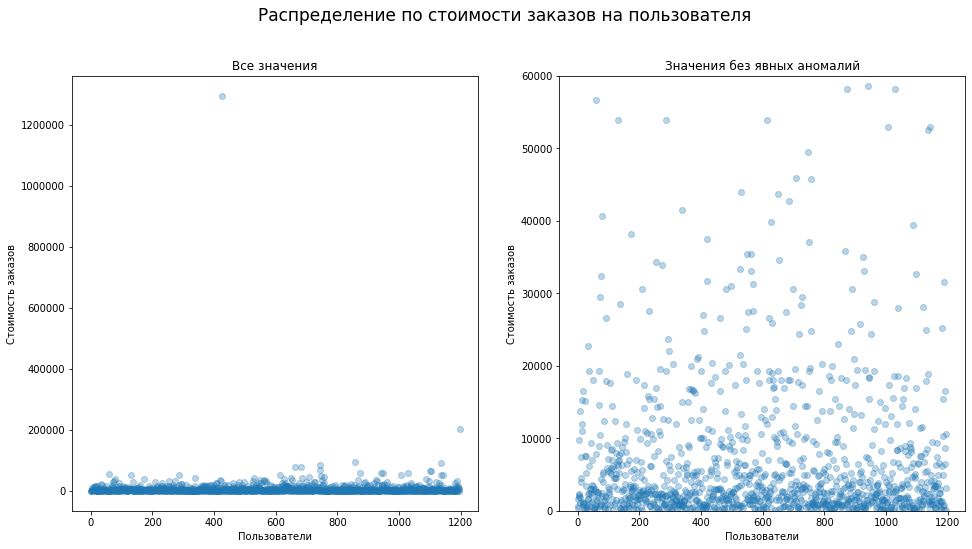

In [33]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (16, 8))


x_values_rev = pd.Series(range(0, len(orders['revenue'])))
ax0.scatter(x_values_rev, orders['revenue'], alpha = 0.3)
ax0.set_title('Все значения')
ax0.set_xlabel('Пользователи')
ax0.set_ylabel('Стоимость заказов')

ax1.scatter(x_values_rev, orders['revenue'], alpha = 0.3)
ax1.set_ylim([0, 60000])
ax1.set_title('Значения без явных аномалий')
ax1.set_xlabel('Пользователи')
ax1.set_ylabel('Стоимость заказов')


fig.suptitle('Распределение по стоимости заказов на пользователя',
             y = 1.0,
             fontsize = 17)
plt.show()

In [34]:
# перцентили:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


5% заказов превышают сумму 28000 рублей и 1% заказов превышает 58233 рубля. Для симметрии и по этому параметру отбросим крайние 2.5%:
посчитаем границей для определения аномальных заказов 97.5 перцентиль, отбросим крайние 2.5%. 

In [35]:
print(np.percentile(orders['revenue'], 97.5))

39529.99999999997


**Определим 39500 рублей (97.5 перцентиля) за верхнюю границу стоимости заказа и отсеем по ней аномальных пользователей**.

### Cтатистическая значимость различий в конверсии между группами по сырым и очищенным данным.

Сформулируем **нулевую и альтернативную гипотезы**, подлежащие проверке: <br>
**H<sub>0</sub>**: Статистически значимых различий в конверсии между группами А и В нет.<br>
**H<sub>1</sub>**: Есть статистически значимые различия в конверсии между группами А и В. 

Проверяем гипотезы **по сырым данным**:

In [36]:
orders_by_users_A = (orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId':\
pd.Series.nunique}))
orders_by_users_A.columns = ['userId', 'orders']

orders_by_users_B = (orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId':\
pd.Series.nunique}))
orders_by_users_B.columns = ['userId', 'orders']

In [37]:
visitors_daily_A = visitors[visitors['group']=='A'][['date', 'visitors']].drop_duplicates()
visitors_daily_B = visitors[visitors['group']=='B'][['date', 'visitors']].drop_duplicates()

In [38]:
sample_A = pd.concat([orders_by_users_A['orders'], pd.Series(0, index = np.arange(visitors_daily_A['visitors'].sum()\
            - len(orders_by_users_A['orders'])), name = 'orders')], axis = 0)
sample_B = pd.concat([orders_by_users_B['orders'], pd.Series(0, index = np.arange(visitors_daily_B['visitors'].sum()\
            - len(orders_by_users_B['orders'])), name = 'orders')], axis = 0)

print('p-value для сравнения конверсии между группами:', '{0:.3f}'.format(st.mannwhitneyu(sample_A, sample_B, alternative = 'two-sided')[1]))
print('Относительный прирост конверсии группы B:', '{0:.3f}'.format(sample_B.mean() / sample_A.mean() -1))

p-value для сравнения конверсии между группами: 0.017
Относительный прирост конверсии группы B: 0.138


<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b> 
       Вывод изменен 👆 
    </div>

p-value = 0.017, меньше 0.05. Значит, **есть основания отвергнуть нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет**. <br>
**Относительный выигрыш группы по В равен 13.8% (по неочищенным данным).** 

Посмотрим теперь **по очищенным данным**:

In [39]:
# отделим аномальных пользователей (по количеству и стоимости заказов)
users_many_orders = pd.concat([
    orders_by_users_A[orders_by_users_A['orders'] > np.percentile(orders_by_users['orders'], 97.5)]['userId'], 
    orders_by_users_B[orders_by_users_B['orders'] > np.percentile(orders_by_users['orders'], 97.5)]['userId']
], axis = 0)

In [40]:
users_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 97.5)]['visitorId']
abnormal_users = (pd.concat([users_many_orders, users_expensive_orders], axis = 0).drop_duplicates().sort_values())
# посчитаем, сколько их
abnormal_users.shape

(35,)

Считаем статистическую значимость различий в конверсии между группами по очищенным данным:

In [41]:
# считаем статистическую значимость различий в конверсии между группами по очищенным данным:
sample_A_filtered = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['userId'].isin(abnormal_users))]\
                    ['orders'], pd.Series(0, index = np.arange(visitors_daily_A['visitors'].sum() - \
                    len(orders_by_users_A['orders'])), name = 'orders')], axis = 0)

sample_B_filtered = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['userId'].isin(abnormal_users))]\
                    ['orders'], pd.Series(0, index = np.arange(visitors_daily_B['visitors'].sum() - \
                    len(orders_by_users_B['orders'])), name = 'orders')], axis = 0)

print('p-value для сравнения конверсии между группами:', '{0:.3f}'.format(st.mannwhitneyu(sample_A_filtered, sample_B_filtered, alternative = 'two-sided')[1]))
print('Относительный прирост конверсии группы B:', '{0:.3f}'.format(sample_B_filtered.mean() / sample_A_filtered.mean() -1))

p-value для сравнения конверсии между группами: 0.009
Относительный прирост конверсии группы B: 0.164


Результаты изменились, но общий вывод **по очищенным данным** тот же: <br>
**отвергаем нулевую гипотезу об отсутствии статистически значимых различий в конверсии между группами; <br>
группа В опережает группу А; <br>
относительный выигрыш группы В вырос до 16.4%** (с 13.8%).

### Cтатистическая значимость различий в среднем чеке между группами по сырым и очищенным данным.

Сформулируем **нулевую и альтернативную гипотезы**, подлежащие проверке: <br>
**H<sub>0</sub>**: Статистически значимых различий в среднем чеке между группами А и В нет.<br>
**H<sub>1</sub>**: Есть статистически значимые различия в среднем чеке между группами А и В. 

**По неочищенным данным**:

In [42]:
print('p-value для сравнения средних чеков между группами', "{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']\
    ['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))

print('Относительный прирост среднего чека группы B',"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/\
    orders[orders['group']=='A']['revenue'].mean()-1))

p-value для сравнения средних чеков между группами 0.729
Относительный прирост среднего чека группы B 0.259


p-value значительно больше 0.05, значит, **оснований отвергать нулевую гипотезу о равенстве средних чеков между группами, нет. 
Разница между средним чеком по группам меньше статистической значимости. <br>
Однако относительный (хотя и не подтвержденный) прирост среднего чека группы В по отношению к группе А больше 25%.** <br> 
Это может быть проблема аномалий в данных.<br>
Посмотрим те же показатели на очищенных данных. 

In [43]:
orders_filtered = orders[np.logical_not(orders['visitorId'].isin(abnormal_users))] 

In [44]:
print('p-value для сравнения средних чеков между группами', "{0:.3f}".format(st.mannwhitneyu(orders_filtered[orders_filtered\
    ['group']=='A']['revenue'], orders_filtered[orders_filtered['group']=='B']['revenue'], alternative = 'two-sided')[1]))

print('Относительный прирост среднего чека группы B',"{0:.3f}".format(orders_filtered[orders_filtered['group']=='B']\
    ['revenue'].mean() / orders_filtered[orders_filtered['group']=='A']['revenue'].mean()-1))

p-value для сравнения средних чеков между группами 0.697
Относительный прирост среднего чека группы B 0.070


Шок, сенсация. Мы по-прежнему **не можем отвергнуть нулевую гипотезу о равенстве средних чеков в группах А и В. Однако эта не получившая подтверждения разница с 25% спустилась до 7%**. 

## Выводы:

**1.** Оценка предложенных гипотез с помощью методов ICE и RICE позволяет сделать вывод о том, что **приоритетными на данный момент являются гипотеза №7 ("Добавить форму подписки на основные страницы") и гипотеза №0 ("Добавить два новых канала привлечения трафика")**. По итогам приоритизации методами ICE и RICE обе они входят в топ-3 (в обоих случаях), компанией их актуальность и значимость (impact) оценена как 7 и 10 из 10. 

**2.** Судя по всему, есть **проблемы с корректностью деления трафика** между группами для проведения теста: **разница в численном составе сравниваемых групп составляет около 15%, а около 18% пользователей являются участниками двух групп одновременно**. Исправить ситуацию на данном этапе нельзя: простое исключение неуникальных участников из исследования может нарушить репрезентативность выборки. <br>
Анализ проведен по имеющимся данным, но на эту проблему необходимо обратить внимание. 

**3.** В данных **обнаружены аномалии**, оказывавшие существенное (но, как выяснилось, не критическое) влияние на показатели значимых метрик. В качестве пограничного значения нормы принят 97.5 перцентиль; **аномальными мы посчитали пользователей, сделавших более 3 заказов, а также заказы на сумму более 39500 рублей**.  Итоговые выводы сделаны на основе данных, очищенных от аномальных значений. 

**4.** Разница в конверсии между группами А и В: <br>
отвергнута гипотеза об отсутствии статистически значимых различий в конверсии между группами.  <br>
**Принимаем гипотезу о наличии статистически значимых различий в конверсии между группами.** <br>
**Группа В опереживает группу A; относительный выигрыш группы В составляет 16.4%.**

**5.** Разница в среднем чеке между группами А и В: <br>
 Не удалось опровергнуть гипотезу о равенстве средних чеков в группах A и В.
 **Статистически значимых различий в среднем чеке между группами нет. 
 Однако предположительная разница (хотя и не получившая подтверждения) составляет 7%, что довольно существенно.
 На графиках видно, что поведение среднего чека нестабильно, рано говорить о фиксации результата. По всей видимости, имеющегося количества наблюдений недостаточно для окончательного вывода.** 

**6.** Решение по результатам теста зависит от того, что было основной целью эксперимента. <br>
Судя по гипотезам, которые компания оценивает как наиболее значимые (столбец 'impact' в таблице с гипотезами), наиболее актуальными задачами сейчас являются привлечение новых пользователей и увеличение конверсии, а не увеличение среднего чека. <br>
**По конверсии результат получен; тест стоит остановить, зафиксировать победу группы В.**<br>
**Если же целью эксперимента является повышение среднего чека, то тест стоит продолжить: окончательный вывод мы пока сделать не можем.** 